# **Introduction**
The dataset under consideration provides a comprehensive overview of fertility rates across various countries spanning from 1960 to 2005. The fertility rate, typically measured as the number of births per woman, is a critical demographic indicator that reflects a country's reproductive behavior and has far-reaching implications for its economic, social, and health policies.

1. Which country has the highest fertility rate for each year? Explain the findings.
2. Which country has the lowest fertility rate for each year? Explain the findings.
3. What countries had the highest and lowest difference in their birth rates from 1960 and 2013?
4. Show what the global trend was for fertility rates from 1960 to 2013?
5. Compare the birth rates changes in a developed region, like the United Kingdom with a developing country, such as Guinea.
6. Compare the birth rate changes in two regions, such as the Middle East and Central Europe.
7. Compare the two most populated countries, India and China.  

These questions can provide insights into the birth rate distribution over time for a specific country or region and a global pattern can be explored using data analysis and visualization techniques. Python packages such as pandas, numpy, matplotlib and seaborn can be used for data analysis and visualization, so they have been imported first. The following libraries have been imported below. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

##### Data Source Information
The dataset has been sourced from - 'https://www.kaggle.com/datasets/rishidamarla/fertility-rates-of-all-countries-1960present/data'.


# Structure of the Dataset

The dataset is structured to provide yearly fertility rates for 215 countries, allowing for both cross-sectional and longitudinal analysis. Each entry in the dataset typically includes:

    Country Name: The name of the country for which the data is recorded.
    Year: The specific year from 1960 to 2013.
    Fertility Rate: The average number of children a woman is expected to have during her lifetime.   

We can inspect the first 10 rows of the dataset below. 

In [5]:
# Display the first 5 rows of the Data
df = pd.read_csv('Fertility-Rates.csv')
df.head(5).style.set_properties(**{"background-color": "#003366","color":"white","border": "1.5px  solid black"})

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,3.226000,3.054000,2.908000,2.788000,2.691000,2.613000,2.552000,2.506000,2.472000,2.446000,2.425000,2.408000,2.392000,2.377000,2.364000,2.353000,2.342000,2.332000,2.320000,2.307000,2.291000,2.272000,2.249000,2.221000,2.187000,2.149000,2.108000,2.064000,2.021000,1.979000,1.940000,1.905000,1.874000,1.848000,1.825000,1.805000,1.786000,1.769000,1.754000,1.739000,1.726000,1.713000,1.701000,1.690000,1.681000,1.673000
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.240000,1.180000,1.250000,1.190000,1.220000,nan,nan,nan
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.670000,7.670000,7.670000,7.669000,7.669000,7.670000,7.671000,7.673000,7.676000,7.679000,7.681000,7.682000,7.682000,7.682000,7.687000,7.700000,7.725000,7.758000,7.796000,7.832000,7.859000,7.869000,7.854000,7.809000,7.733000,7.623000,7.484000,7.321000,7.136000,6.930000,6.702000,6.456000,6.196000,5.928000,5.659000,5.395000,5.141000,4.900000
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316000,7.354000,7.385000,7.410000,7.425000,7.430000,7.422000,7.403000,7.375000,7.339000,7.301000,7.264000,7.232000,7.208000,7.192000,7.185000,7.186000,7.189000,7.194000,7.197000,7.200000,7.201000,7.203000,7.205000,7.207000,7.208000,7.206000,7.202000,7.194000,7.182000,7.165000,7.143000,7.116000,7.087000,7.054000,7.019000,6.984000,6.949000,6.913000,6.878000,6.844000,6.811000,6.778000,6.743000,6.704000,6.657000,6.598000,6.523000,6.434000,6.331000,6.218000,6.099000,5.979000,5.863000
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186000,6.076000,5.956000,5.833000,5.711000,5.594000,5.483000,5.376000,5.268000,5.160000,5.050000,4.933000,4.809000,4.677000,4.538000,4.393000,4.244000,4.094000,3.947000,3.807000,3.678000,3.562000,3.460000,3.372000,3.297000,3.233000,3.177000,3.126000,3.075000,3.023000,2.970000,2.917000,2.867000,2.819000,2.772000,2.723000,2.670000,2.611000,2.543000,2.467000,2.383000,2.291000,2.195000,2.097000,2.004000,1.919000,1.849000,1.796000,1.761000,1.744000,1.741000,1.748000,1.760000,1.771000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    215 non-null    object 
 1   Country Code    215 non-null    object 
 2   Indicator Name  215 non-null    object 
 3   Indicator Code  215 non-null    object 
 4   1960            190 non-null    float64
 5   1961            191 non-null    float64
 6   1962            190 non-null    float64
 7   1963            189 non-null    float64
 8   1964            190 non-null    float64
 9   1965            190 non-null    float64
 10  1966            190 non-null    float64
 11  1967            190 non-null    float64
 12  1968            190 non-null    float64
 13  1969            190 non-null    float64
 14  1970            190 non-null    float64
 15  1971            191 non-null    float64
 16  1972            192 non-null    float64
 17  1973            190 non-null    flo

# Data Cleaning
There are 215 countries and 58 columns. 4 columns have text (**object**) and the other 54 have decimal values (**float**).
 We will clean the data by:
1. Checking and deleting columns that are not needed, for example, Country Code, Indicator Name, and Indicator Code. 
2. Deleting rows with more than 40 missing values, as that is more than half their data missing. 
         

In [8]:
# Check if a specific column has unique values
column_name = 'Indicator Name'
is_unique = df[column_name].nunique() == len(df[column_name])

print(f"Column '{column_name}' has unique values: {is_unique}")

column_name = 'Indicator Code'
is_unique = df[column_name].nunique() == len(df[column_name])

print(f"Column '{column_name}' has unique values: {is_unique}")

Column 'Indicator Name' has unique values: False
Column 'Indicator Code' has unique values: False


The 'is_unique' attribute of a pandas library returns 'True' if all values in the column are unique, otherwise 'False'. As we have a 'False' value for both these columns do not have unique values, i.e. the same values for all rows, so we do not need them. They will be deleted and then we can recheck the first 5 rows of the data. We also do not need the country code, so that will also get deleted. 

In [10]:
# List of columns to be deleted
columns_to_drop = ['Indicator Name', 'Indicator Code', 'Country Code']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first 10 rows of the Data to verify
df.head(10).style.set_properties(**{"background-color": "#003366","color":"white","border": "1.5px  solid black"})

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,3.226000,3.054000,2.908000,2.788000,2.691000,2.613000,2.552000,2.506000,2.472000,2.446000,2.425000,2.408000,2.392000,2.377000,2.364000,2.353000,2.342000,2.332000,2.320000,2.307000,2.291000,2.272000,2.249000,2.221000,2.187000,2.149000,2.108000,2.064000,2.021000,1.979000,1.940000,1.905000,1.874000,1.848000,1.825000,1.805000,1.786000,1.769000,1.754000,1.739000,1.726000,1.713000,1.701000,1.690000,1.681000,1.673000
1,Andorra,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.240000,1.180000,1.250000,1.190000,1.220000,nan,nan,nan
2,Afghanistan,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.671000,7.670000,7.670000,7.670000,7.669000,7.669000,7.670000,7.671000,7.673000,7.676000,7.679000,7.681000,7.682000,7.682000,7.682000,7.687000,7.700000,7.725000,7.758000,7.796000,7.832000,7.859000,7.869000,7.854000,7.809000,7.733000,7.623000,7.484000,7.321000,7.136000,6.930000,6.702000,6.456000,6.196000,5.928000,5.659000,5.395000,5.141000,4.900000
3,Angola,7.316000,7.354000,7.385000,7.410000,7.425000,7.430000,7.422000,7.403000,7.375000,7.339000,7.301000,7.264000,7.232000,7.208000,7.192000,7.185000,7.186000,7.189000,7.194000,7.197000,7.200000,7.201000,7.203000,7.205000,7.207000,7.208000,7.206000,7.202000,7.194000,7.182000,7.165000,7.143000,7.116000,7.087000,7.054000,7.019000,6.984000,6.949000,6.913000,6.878000,6.844000,6.811000,6.778000,6.743000,6.704000,6.657000,6.598000,6.523000,6.434000,6.331000,6.218000,6.099000,5.979000,5.863000
4,Albania,6.186000,6.076000,5.956000,5.833000,5.711000,5.594000,5.483000,5.376000,5.268000,5.160000,5.050000,4.933000,4.809000,4.677000,4.538000,4.393000,4.244000,4.094000,3.947000,3.807000,3.678000,3.562000,3.460000,3.372000,3.297000,3.233000,3.177000,3.126000,3.075000,3.023000,2.970000,2.917000,2.867000,2.819000,2.772000,2.723000,2.670000,2.611000,2.543000,2.467000,2.383000,2.291000,2.195000,2.097000,2.004000,1.919000,1.849000,1.796000,1.761000,1.744000,1.741000,1.748000,1.760000,1.771000
5,United Arab Emirates,6.928000,6.910000,6.893000,6.877000,6.861000,6.841000,6.816000,6.783000,6.738000,6.679000,6.605000,6.512000,6.402000,6.279000,6.146000,6.009000,5.873000,5.744000,5.624000,5.517000,5.423000,5.344000,5.274000,5.209000,5.141000,5.065000,4.973000,4.860000,4.724000,4.566000,4.388000,4.193000,3.989000,3.784000,3.583000,3.393000,3.215000,3.052000,2.902000,2.766000,2.644000,2.532000,2.428000,2.329000,2.236000,2.149000,2.071000,2.004000,1.948000,1.903000,1.868000,1.841000,1.820000,1.801000
6,Argentina,3.109000,3.100000,3.089000,3.078000,3.068000,3.058000,3.051000,3.048000,3.049000,3.056000,3.073000,3.104000,3.148000,3.203000,3.264000,3.321000,3.366000,3.391000,3.391000,3.368000,3.325000,3.270000,3.213000,3.163000,3.123000,3.093000,3.073000,3.056000,3.037000,3.016000,2.989000,2.956000,2.918000,2.875000,2.827000,2.774000,2.717000,2.657000,2.596000,2.535000,2.477000,2.424000,2.379000,2.340000,2.310000,2.286000,2.268000,2.254000,2.241000,2.228000,2.215000,2.201000,2.188000,2.175000
7,Armenia,4.550000,4.512000,4.435000,4.317000,4.161000,3.979000,3.788000,3.606000,3.447000,3.314000,3.208000,3.118000,3.032000,2.942000,2.846000,2.745000,2.646000,2.555000,2.479000,2.421000,2.385000,2.373000,2.381000,2.406000,2.441000,2.481000,2.519000,2.549000,2.566000,2.565000,2.538000,2.482000,2.399000,2.295000,2.176000,2.053000,1.938000,1.838000,1.762000,1.712000,1.688000,1.684000,1.692000,1.704000,1.715000,1.724000,1.728000,1.731000,1.734000,1.736000,1.738000,1.73

Now we will remove rows that have more than 40 missing values. 

In [12]:
# Count missing values in each row
missing_counts_per_row = df.isnull().sum(axis=1)

# Find rows with more than 40 missing values
rows_with_more_than_40_missing = df[missing_counts_per_row > 40]

# Drop rows where the number of missing values exceeds 40
df_cleaned = df[missing_counts_per_row <= 40]

# If you want to update the original Data, you can reassign it
df = df_cleaned

# Display 10 random rows after removing the rows with missing values

df.sample(10).style.set_properties(**{"background-color": "#003366","color":"white","border": "1.5px  solid black"})

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
105,Kuwait,7.251000,7.279000,7.312000,7.348000,7.381000,7.407000,7.419000,7.413000,7.383000,7.327000,7.241000,7.124000,6.978000,6.809000,6.622000,6.427000,6.234000,6.050000,5.874000,5.703000,5.524000,5.319000,5.075000,4.786000,4.456000,4.092000,3.704000,3.313000,2.944000,2.615000,2.358000,2.200000,2.144000,2.182000,2.300000,2.467000,2.642000,2.788000,2.878000,2.903000,2.869000,2.796000,2.718000,2.660000,2.630000,2.628000,2.645000,2.667000,2.681000,2.683000,2.673000,2.652000,2.626000,2.600000
12,Azerbaijan,5.571000,5.596000,5.591000,5.549000,5.468000,5.352000,5.210000,5.056000,4.901000,4.753000,4.612000,4.479000,4.348000,4.216000,4.084000,3.950000,3.814000,3.676000,3.539000,3.407000,3.286000,3.179000,3.092000,3.026000,2.980000,2.910000,2.900000,2.902600,2.800000,2.800000,2.740000,2.870000,2.740000,2.700000,2.520000,2.290000,2.060000,2.070000,2.000000,2.070000,2.000000,1.800000,1.800000,1.900000,2.053500,2.000000,1.970000,1.970000,1.900000,1.820000,1.920000,1.960000,2.000000,2.000000
199,Ukraine,2.240000,2.170000,2.140000,2.060000,1.960000,1.990000,2.020000,2.010000,1.998000,2.040000,2.090000,2.120000,2.080000,2.040000,2.040000,2.020000,1.990000,1.940000,1.960000,1.960000,1.950000,1.930000,1.980000,2.080000,2.090000,2.060000,2.080000,2.050000,2.020000,1.920000,1.844000,1.773000,1.674000,1.563000,1.470000,1.397000,1.332000,1.270000,1.207000,1.121000,1.110000,1.085000,1.126000,1.172000,1.218000,1.213000,1.310000,1.345000,1.458000,1.460000,1.445000,1.459000,1.531000,1.506000
138,Namibia,6.150000,6.167000,6.184000,6.199000,6.216000,6.236000,6.263000,6.301000,6.347000,6.401000,6.459000,6.517000,6.570000,6.613000,6.642000,6.654000,6.647000,6.622000,6.581000,6.524000,6.451000,6.362000,6.259000,6.145000,6.022000,5.893000,5.760000,5.625000,5.491000,5.358000,5.227000,5.098000,4.970000,4.842000,4.715000,4.590000,4.469000,4.351000,4.240000,4.134000,4.033000,3.938000,3.847000,3.759000,3.674000,3.591000,3.512000,3.436000,3.364000,3.295000,3.229000,3.167000,3.107000,3.051000
108,Liberia,6.406000,6.429000,6.453000,6.476000,6.500000,6.524000,6.552000,6.583000,6.617000,6.655000,6.695000,6.736000,6.777000,6.815000,6.849000,6.880000,6.907000,6.930000,6.950000,6.964000,6.973000,6.973000,6.964000,6.946000,6.917000,6.875000,6.820000,6.752000,6.673000,6.587000,6.499000,6.414000,6.336000,6.267000,6.208000,6.156000,6.109000,6.061000,6.008000,5.948000,5.880000,5.804000,5.722000,5.635000,5.547000,5.456000,5.366000,5.277000,5.190000,5.106000,5.024000,4.945000,4.868000,4.792000
194,Turkey,6.303000,6.241000,6.175000,6.104000,6.029000,5.951000,5.874000,5.797000,5.721000,5.644000,5.563000,5.475000,5.375000,5.263000,5.140000,5.008000,4.872000,4.738000,4.608000,4.483000,4.361000,4.239000,4.114000,3.982000,3.844000,3.704000,3.563000,3.427000,3.300000,3.183000,3.078000,2.987000,2.906000,2.835000,2.772000,2.715000,2.661000,2.609000,2.557000,2.506000,2.454000,2.404000,2.356000,2.311000,2.270000,2.234000,2.202000,2.173000,2.147000,2.123000,2.101000,2.080000,2.060000,2.041000
38,Cameroon,5.647000,5.705000,5.766000,5.828000,5.890000,5.949000,6.005000,6.058000,6.110000,6.159000,6.205000,6.247000,6.286000,6.322000,6.356000,6.391000,6.429000,6.470000,6.516000,6.563000,6.609000,6.651000,6.683000,6.703000,6.708000,6.697000,6.669000,6.627000,6.572000,6.508000,6.434000,6.352000,6.264000,6.173000,6.080000,5.989000,5.903000,5.823000,5.749000,5.682000,5.621000,5.567000,5.515000,5.464000,5.413000,5.358000,5.299000,5.235000,5.167000,5.094000,5.017000,4.939000,4.859000,4.780000
128,Malta,3.620000,3.270000,3.240000,2.900000,2.790000,2.520000,2.330000,2.240000,2.120000,2.020000,2.030000,2.060000,2.010000,1.650000,1.640000,2.270000,2.210000,2.140000,2.050000,2.100000,1.990000,1.870000,1.900000,1.920000,1.95

# Data Summary
Let's have a glimpse of the summary of the dataset. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 214
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  198 non-null    object 
 1   1960          190 non-null    float64
 2   1961          190 non-null    float64
 3   1962          190 non-null    float64
 4   1963          189 non-null    float64
 5   1964          190 non-null    float64
 6   1965          190 non-null    float64
 7   1966          190 non-null    float64
 8   1967          190 non-null    float64
 9   1968          190 non-null    float64
 10  1969          190 non-null    float64
 11  1970          190 non-null    float64
 12  1971          191 non-null    float64
 13  1972          190 non-null    float64
 14  1973          190 non-null    float64
 15  1974          190 non-null    float64
 16  1975          190 non-null    float64
 17  1976          191 non-null    float64
 18  1977          190 non-null    float

After cleaning the data, 17 countries were deleted as they had more than 40 missing values. 3 unnecessary columns were deleted, and our data types are correct. Now, we can analyze the data. 

# Data Analysis


**1. Which country has the highest fertility rate for each year? Explain the findings.**


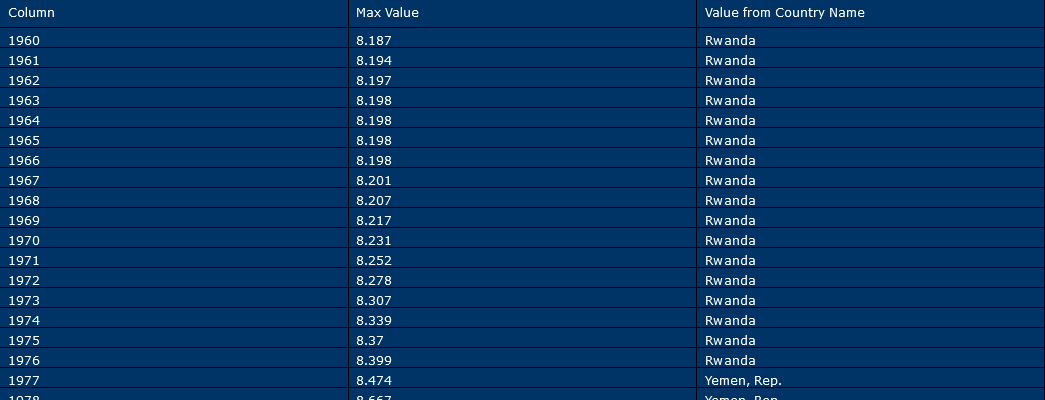

In [38]:
# Function to get max value and corresponding value from the first column for each column, excluding the first column
def max_value_and_specific_row_value(df, specific_column):
    results = []
    for col in df.columns[1:]:  # Skip the first column
        max_value = df[col].max()
        max_row = df[df[col] == max_value].iloc[0]
        specific_value = max_row[specific_column]
        results.append((col, max_value, specific_value))
    return results

# Specify the first column
first_column = df.columns[0]

# Get the maximum values and corresponding values from the first column, excluding the first column itself
max_values = max_value_and_specific_row_value(df, first_column)

# Create a new DataFrame to hold the results
results_df = pd.DataFrame(max_values, columns=['Column', 'Max Value', f'Value from {first_column}'])

# Create a Plotly table with the specified color scheme
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['Column', 'Max Value', f'Value from {first_column}'],
        fill_color='#003366',
        font=dict(color='white'),
        align='left',
        line_color='black'
    ),
    cells=dict(
        values=[results_df['Column'], results_df['Max Value'], results_df[f'Value from {first_column}']],
        fill_color='#003366',
        font=dict(color='white'),
        align='left',
        line_color='black'
    )
)])

# Update layout to make the table horizontally scrollable
fig.update_layout(
    width=800,
    height=400,
    margin=dict(l=0, r=0, b=0, t=0),
    autosize=True
)

# Show the figure
fig.show()

The data reveals a significant shift in the country with the highest birth rate over the decades. Initially, Rwanda held the top position from 1960 to 1976, with birth rates steadily increasing, peaking at 8.399 births per woman in 1976. This high birth rate during Rwanda's early years reflects its demographic trends, characterized by high fertility rates typical of many developing nations during that period.

From 1977 to 1994, Yemen, Rep. (now Yemen) took over as the country with the highest birth rate. The birth rate in Yemen surged to an impressive 9.223 births per woman by 1983, indicating a period of rapid population growth. A significant reason for Yemen's high birth rate during the late 20th century was strong cultural and societal values favoring large families. Economic factors also played a role, as children were seen as contributors to the family's economic stability.

The mid-1990s mark a notable transition as Afghanistan briefly surpassed Yemen in 1995-1999. During this time, Afghanistan's birth rates remained high but were slightly lower than Yemen's peak rates. The high birth rates in Afghanistan reflect the country's socio-economic challenges and limited healthcare infrastructure.

From 2000 onwards, Niger emerged as the country with the highest birth rate, a position it has maintained through to 2013. Niger’s birth rate remained remarkably high, reaching a peak of 7.617 births per woman in 2005. This sustained high birth rate highlights the continuing demographic pressures and the country’s struggle with high fertility rates despite various efforts to improve access to family planning and healthcare.

**2. Which country has the lowest fertility rate for each year? Explain the findings.**

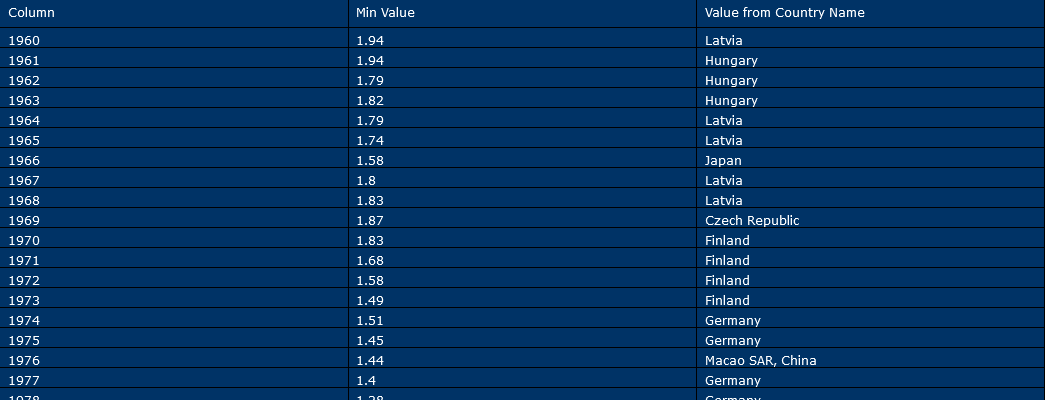

In [40]:
# Function to get max value and corresponding value from the first column for each column, excluding the first column
def min_value_and_specific_row_value(df, specific_column):
    results = []
    for col in df.columns[1:]:  # Skip the first column as this is the country name and has no minimum value
        min_value = df[col].min()
        min_row = df[df[col] == min_value].iloc[0]
        specific_value = min_row[specific_column]
        results.append((col, min_value, specific_value))
    return results

# Specify the first column
first_column = df.columns[0]

# Get the maximum values and corresponding values from the first column, excluding the first column itself
min_values = min_value_and_specific_row_value(df, first_column)

# Create a new DataFrame to hold the results
results_df = pd.DataFrame(min_values, columns=['Column', 'Min Value', f'Value from {first_column}'])

# Create a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['Column', 'Min Value', f'Value from {first_column}'],
        fill_color='#003366',
        font=dict(color='white'),
        align='left',
        line_color='black'
    ),
    cells=dict(
        values=[results_df['Column'], results_df['Min Value'], results_df[f'Value from {first_column}']],
        fill_color='#003366',
        font=dict(color='white'),
        align='left',
        line_color='black'
    )
)])

# Update layout to make the table vertically scrollable
fig.update_layout(
    width=800,
    height=400,
    margin=dict(l=0, r=0, b=0, t=0),
    autosize=True
)

# Show the figure
fig.show()

The data reveals notable trends in the countries with the lowest birth rates from 1960 to 2013. Initially, countries like Latvia and Hungary had the lowest birth rates in the 1960s, reflecting the early stages of demographic transition in Eastern Europe. Latvia's birth rate fluctuated between 1.940 and 1.740, while Hungary's rate decreased from 1.940 in 1961 to 1.790 in 1962, indicating a period of demographic shifts.

As we moved into the 1970s through to 1990s, Finland, Germany and Hong Kong became prominent for their low birth rates. Finland experienced a decline from 1.830 in 1970 to 1.490 in 1973, reflecting the impact of socio-economic changes and advancements in family planning. Germany's birth rate consistently remained low, with significant declines, reaching 1.290 by 1984. This pattern was indicative of Western Europe's broader trend of low fertility rates during this period.

By the late 1990s and early 2000s, Hong Kong, and Macao, emerged as regions with the lowest birth rates globally. Hong Kong birth rate dropped to 0.982 in 1999, and Macao rate fell below 1.000 from 2000 onward till 2009, reaching a low of 0.836 in 2004. This dramatic decline in Macao birth rate reflects the region's rapid economic growth, urbanization, and effective family planning policies, which are common in many highly developed areas.



**3. What countries had the highest and lowest difference in their birth rates from 1960 and 2013?**


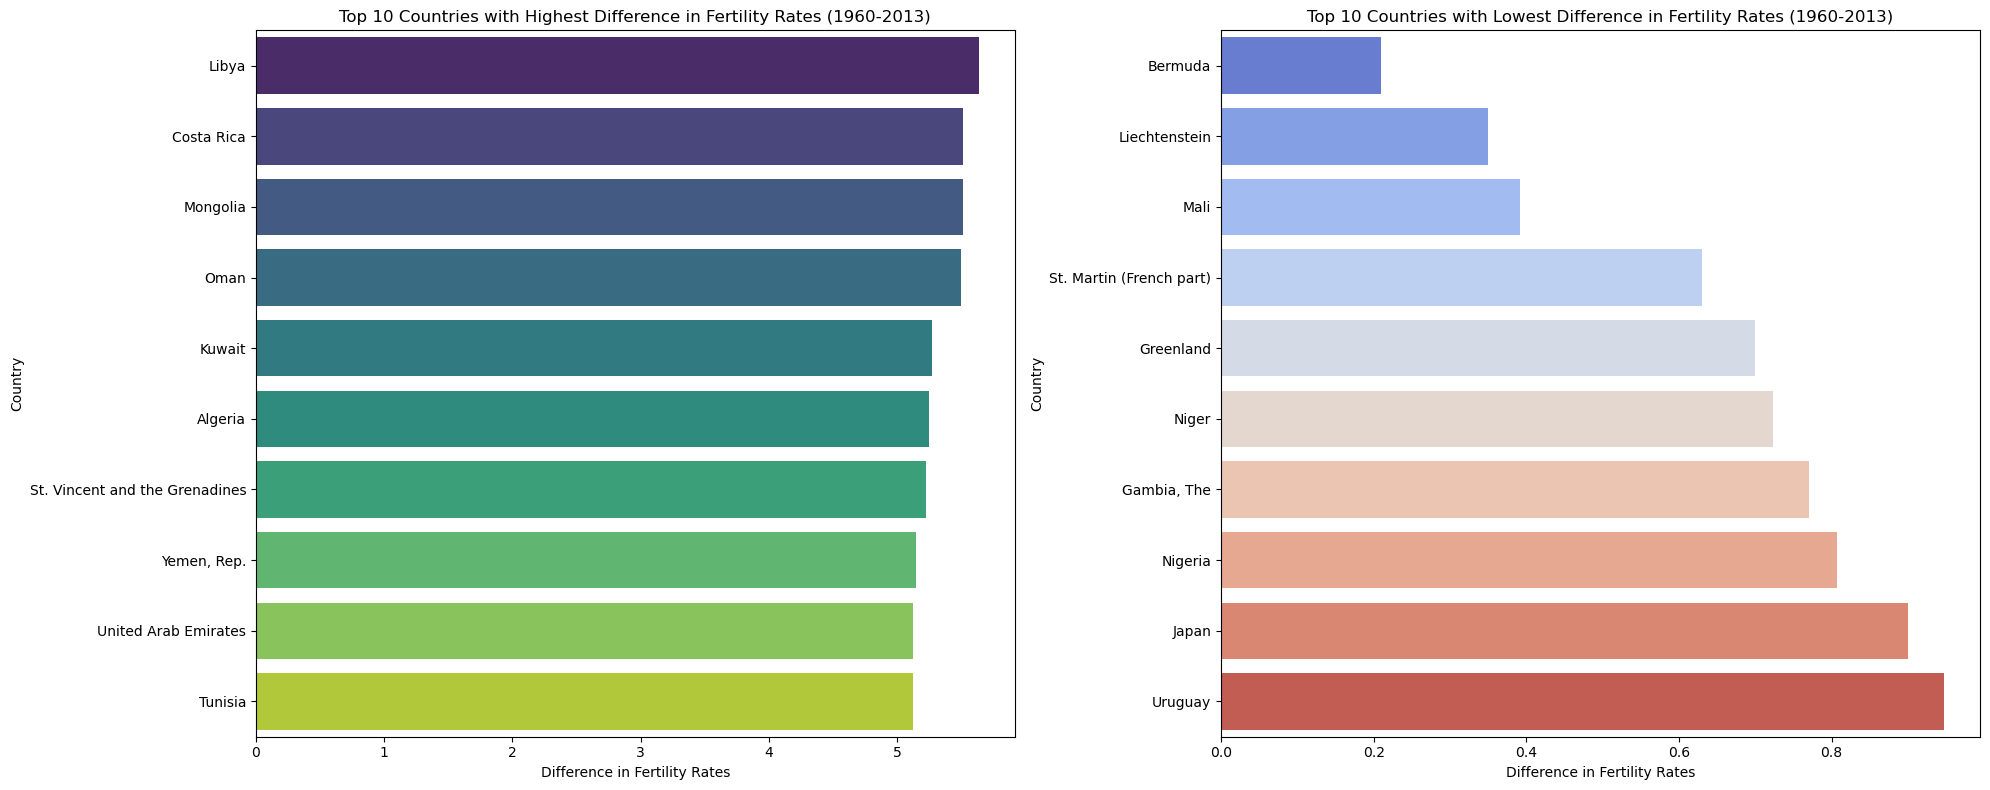

In [43]:
# Calculate the difference between the highest and lowest fertility rates for each country,
# ignoring the first column (which is 'Country Name')
df['Difference'] = df.iloc[:, 1:].max(axis=1) - df.iloc[:, 1:].min(axis=1)

# Get the top ten countries with the highest and lowest differences
top_ten = df.nlargest(10, 'Difference')
bottom_ten = df.nsmallest(10, 'Difference')

# Plotting both bar charts side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot for top 10 countries with the highest difference
sns.barplot(x='Difference', y='Country Name', data=top_ten, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Difference in Fertility Rates (1960-2013)')
axes[0].set_xlabel('Difference in Fertility Rates')
axes[0].set_ylabel('Country')

# Plot for top 10 countries with the lowest difference
sns.barplot(x='Difference', y='Country Name', data=bottom_ten, palette='coolwarm', ax=axes[1])
axes[1].set_title('Top 10 Countries with Lowest Difference in Fertility Rates (1960-2013)')
axes[1].set_xlabel('Difference in Fertility Rates')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

# Drop the 'Difference' column to revert to the original data
df = df.drop(columns=['Difference'])

The first chart shows that Libya, Costa Rica, and Mongolia experienced the highest reductions in fertility rates between 1960 and 2013, with decreases of around 5.5, 5.3, and 5.2 births per woman, respectively, reflecting significant socio-economic transformations.

The second chart indicates that Bermuda, Liechtenstein, and Mali had the lowest differences in fertility rates, with changes of approximately 0.2, 0.3, and 0.3 births per woman, suggesting relatively stable fertility rates over this period.

# **Data Exploration**

**4. Show what the global trend was for fertility rates from 1960 to 2013?**


In [ ]:
df.describe().T.style.set_properties(**{"background-color": "#003366","color":"white","border": "1.5px  solid black"})

We can plot the mean values for each year to see the global trend in fertility rates. 

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



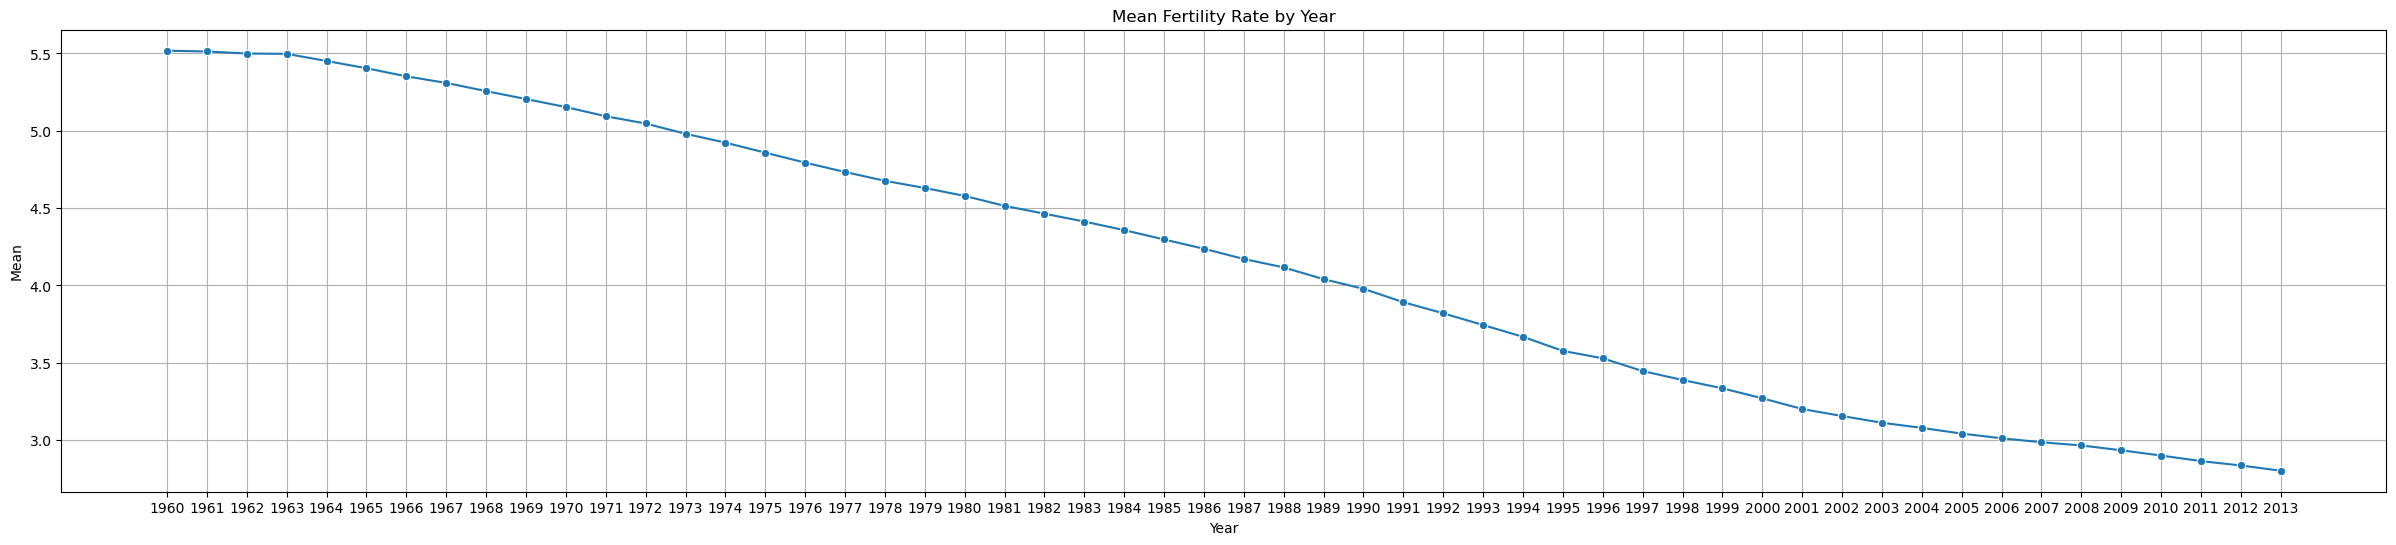

In [45]:
# Ignoring the first row and the first column
df_trimmed = df.iloc[1:, 1:]

# Calculate the mean of each column in the trimmed DataFrame
mean_values = df_trimmed.mean()

# Reset the index to get a proper format for plotting
mean_values = mean_values.reset_index()
mean_values.columns = ['Column', 'Mean']

# Plotting
plt.figure(figsize=(30, 6))
sns.lineplot(data=mean_values, x='Column', y='Mean', marker='o')
plt.title('Mean Fertility Rate by Year')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.grid(True)
plt.show()

The graph clearly illustrates the global trend in fertility rates from 1960 to 2013, demonstrating a significant and consistent decline over this period. Here are the key points:

**High Fertility Rates in the Early 1960s:**
    
The graph starts with high fertility rates around 5.5 children per woman.
This high rate is indicative of a time when many countries had limited access to family planning and higher desired family sizes.

**Steady Decline Over the Decades:**
    
From the 1960s to the mid-1970s, the fertility rate shows a gradual decline.
This period marks the beginning of increased awareness and use of contraceptives and family planning programs.

**Accelerated Decline in the Late 20th Century:**
    
From the late 1970s to the early 1990s, the rate of decline accelerates.
Factors such as improved healthcare, women's education, and economic development contribute to this trend.
Countries across various regions implemented policies to control population growth, further aiding the decline.

**Continued Decline into the 21st Century:**
    
The decline continues steadily through the 1990s and into the 21st century, reaching below 3 children per woman by 2013.
Advances in reproductive health services, socio-economic development, and shifts in societal norms regarding family size are critical factors.

**Regional Variations:**
    
While the global trend shows a decline, regional variations exist, with some countries experiencing slower declines due to cultural, economic, and infrastructural factors.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



The histograms provide a visual representation of the fertility rates around the world in 1960 and 2013.


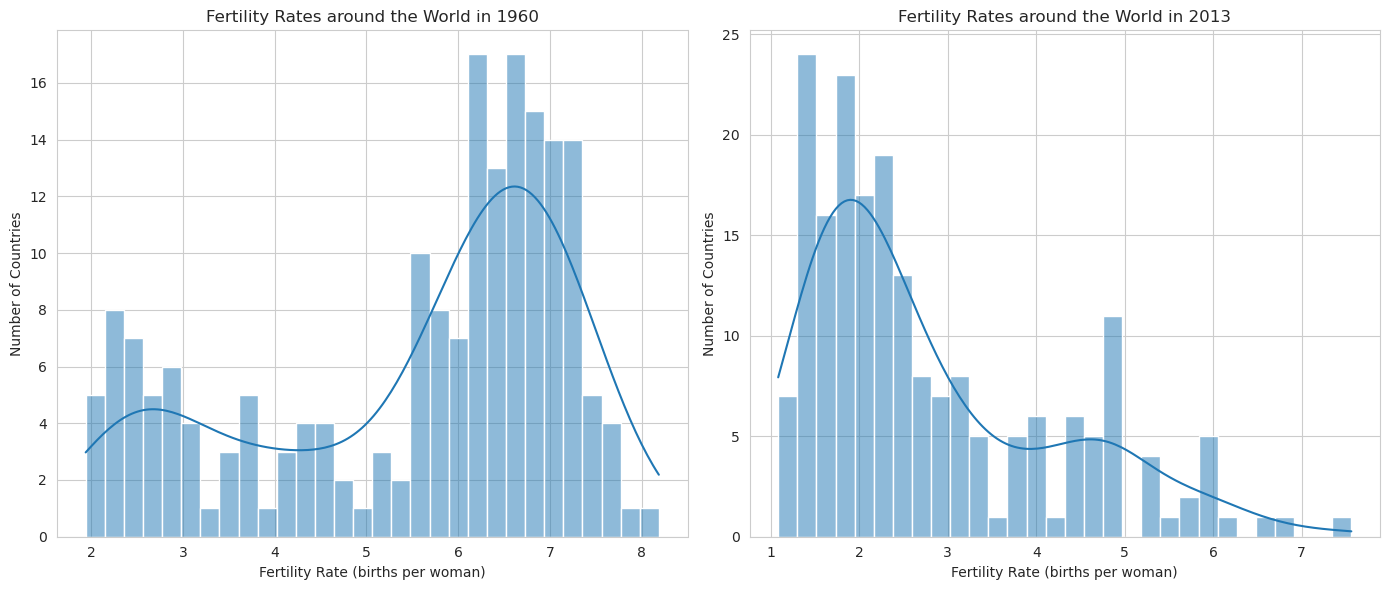

In [48]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Populate the histograms for 1960
sns.histplot(df['1960'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Fertility Rates around the World in 1960')
ax[0].set_xlabel('Fertility Rate (births per woman)')
ax[0].set_ylabel('Number of Countries')

# Populate the histograms for 2013
sns.histplot(df['2013'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Fertility Rates around the World in 2013')
ax[1].set_xlabel('Fertility Rate (births per woman)')
ax[1].set_ylabel('Number of Countries')

print('The histograms provide a visual representation of the fertility rates around the world in 1960 and 2013.')

plt.tight_layout()
plt.show()

Here are the key conclusions we can draw about the trends:

**Decrease in Fertility Rates:**

In 1960, the majority of countries had high fertility rates, with a peak of around 6-7 births per woman.
By 2013, fertility rates had significantly decreased. Most countries had fertility rates between 1 and 3 births per woman, with a peak of around 2 births per woman.

**Shift in Distribution:**

The 1960 distribution shows a more varied range of fertility rates, with a significant number of countries having very high rates (6-8 births per woman).
In 2013, the distribution was more concentrated around lower fertility rates, indicating a global trend towards smaller family sizes.

**Reduction in High Fertility Rates:**

The number of countries with very high fertility rates (above 5 births per woman) has drastically reduced by 2013. There are very few countries with fertility rates above 5 in 2013 compared to 1960.

**Increase in Low Fertility Rates:**

In 1960, almost no countries had fertility rates below 2 births per woman. By 2013, many countries had fertility rates between 1 and 2 births per woman, indicating a trend towards lower fertility rates globally.

**5. Compare the birth rate changes in a developed region, like the United Kingdom with a developing country, such as Guinea.**

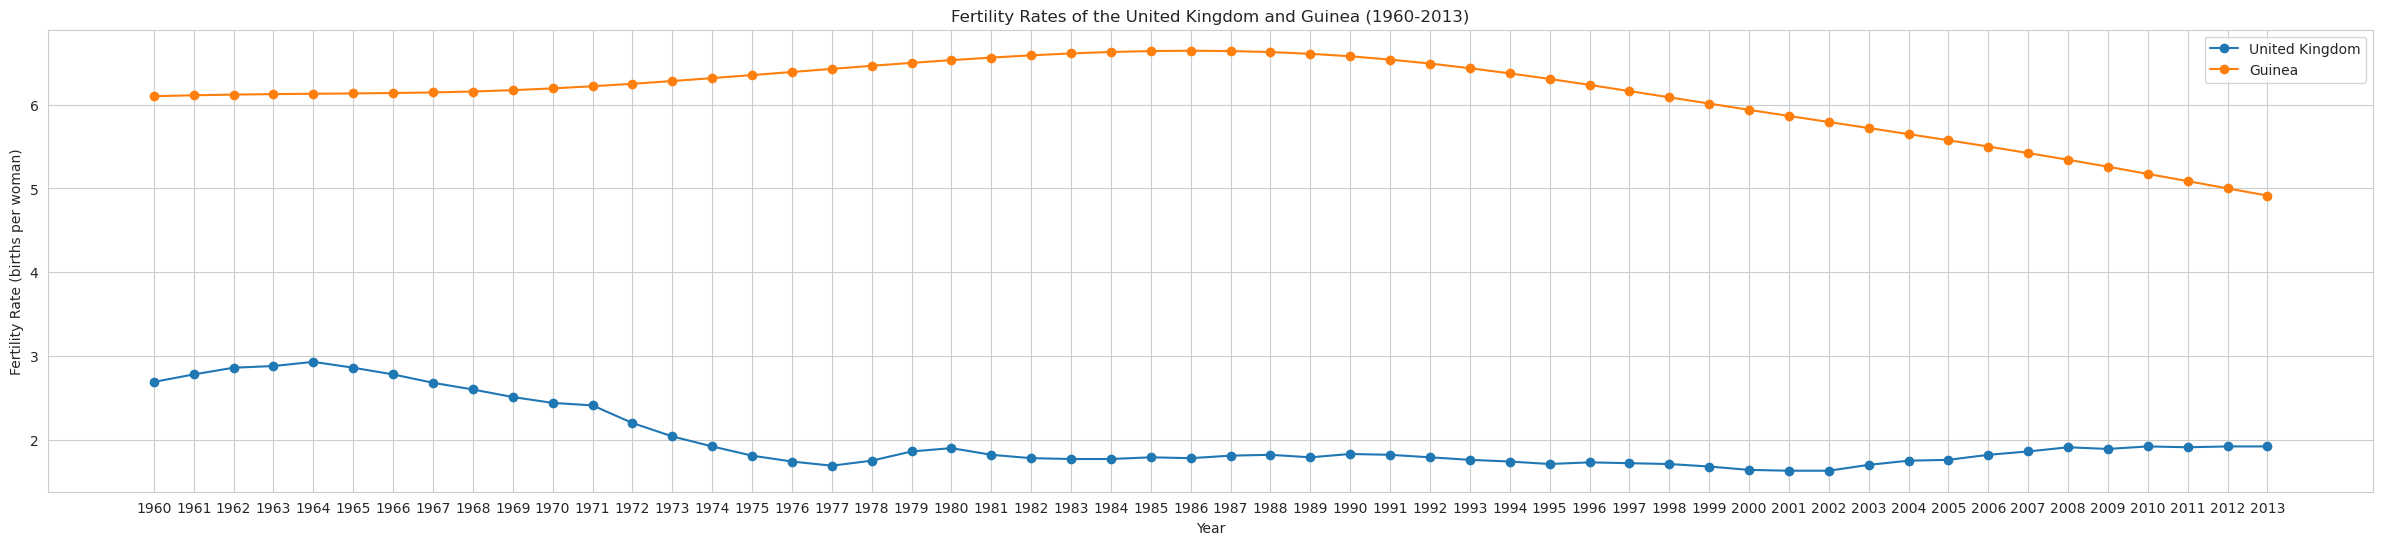

In [50]:
# Set the country column as the index
df.set_index('Country Name', inplace=True)

# Transpose the dataframe for easier plotting
df_transposed = df.T

# Filter the data for the United Kingdom and Guinea
uk_fertility = df_transposed['United Kingdom']
guinea_fertility = df_transposed['Guinea']

# Plot the fertility rates over the years
plt.figure(figsize=(30, 6))
plt.plot(uk_fertility.index, uk_fertility.values, label='United Kingdom', marker='o')
plt.plot(guinea_fertility.index, guinea_fertility.values, label='Guinea', marker='o')

# Add titles and labels
plt.title('Fertility Rates of the United Kingdom and Guinea (1960-2013)')
plt.xlabel('Year')
plt.ylabel('Fertility Rate (births per woman)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Reset the index to restore 'Country Name' as a column
df_reset = df.reset_index()

**United Kingdom:**

**1960s:**

The fertility rate in the UK was relatively high, averaging around 2.5 to 3.0 children per woman, peaking in 1964.

**1970s-1980s:**

There was a notable decline in fertility rates during this period. By the mid-70s, the fertility rate had dropped to below 2.0 children per woman but there was a marginal gain after 1977 through the 1980. However, the rate initially fell then stabilized in the 80s. 
 
**1990s:**

The decline continued, with fertility rates falling to around 1.6 to 1.7 children per woman by the late 1990s.

**2000s-2013:**

Fertility rates in the UK stabilized somewhat, hovering around 1.8 to 1.9 children per woman in the early 2000s. There were slight fluctuations, but the general trend was a stable low fertility rate.

**Guinea:**

**1960s:**

Guinea had a much higher fertility rate compared to developed nations. The fertility rate was around 6.0 to 6.5 children per woman.

**1970s-1980s:**

The fertility rate remained high and there were slight inclines. By the late 1980s, it was still around 6.5 to 7 children per woman, peaking by the mid-80s.

**1990s:**

There was a gradual decrease in fertility rates during this decade, falling to about 6.5 to 6.0 children per woman by the end of the 1990s.

**2000s-2013:**

The decline continued, with fertility rates decreasing to approximately 5.0 to 5.5 children per woman by 2013. 

**Comparison:**

**Land:** The UK and Guinea have similar land areas, with Guinea being marginally larger.

**Trend:** The UK saw a steady decline in fertility rates, reflecting a mature demographic transition. Guinea experienced high, though declining, fertility rates, indicative of ongoing developmental changes.

**Socioeconomic Factors:** Lower fertility in the UK correlates with higher education and economic development; higher fertility in Guinea is linked to lower education and development levels.

**Population Growth:** The UK had moderate population growth, influenced by low fertility and immigration. Guinea faced high population growth due to higher fertility rates, though the growth rate was slowing. The UK’s population is significantly larger than Guinea’s, leading to higher population density in the UK.

**6. Compare the birth rate changes in two regions, such as the Middle East and Central Europe.**



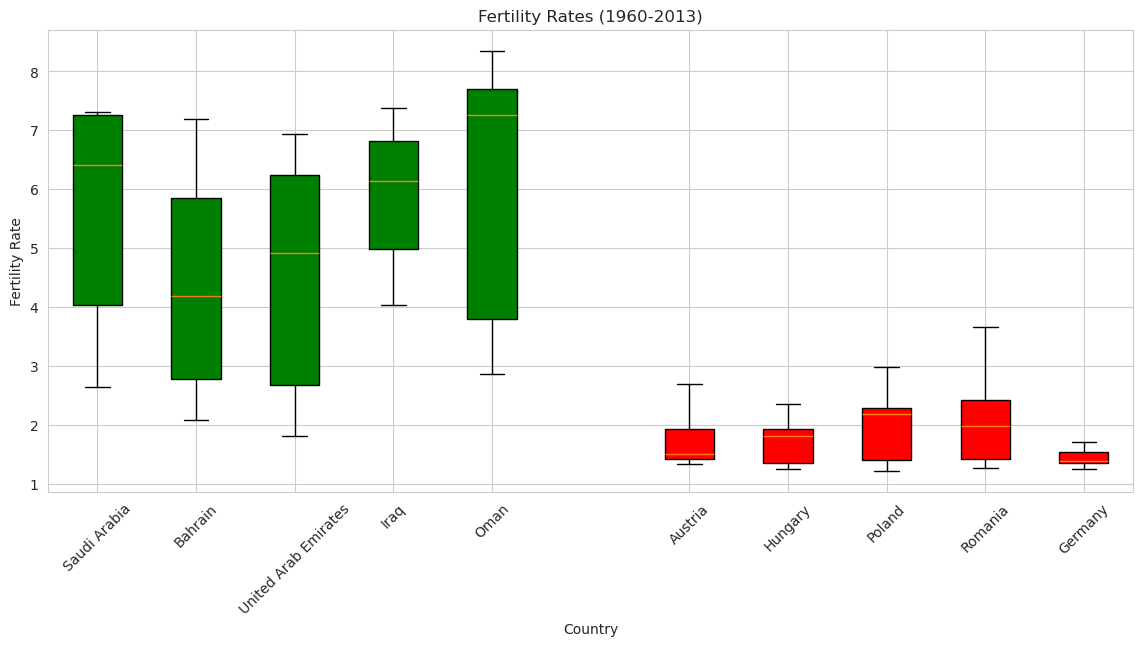

In [52]:
# Define the countries in the regions
middle_east_countries = ['Saudi Arabia', 'Bahrain', 'United Arab Emirates', 'Iraq', 'Oman']
central_europe_countries = ['Austria', 'Hungary', 'Poland', 'Romania', 'Germany']

# Extract data for Middle East and Central Europe
middle_east_data = df.loc[middle_east_countries].dropna(axis=1, how='all')
central_europe_data = df.loc[central_europe_countries].dropna(axis=1, how='all')

# Transpose the data for plotting
middle_east_data = middle_east_data.T.values
central_europe_data = central_europe_data.T.values

# Create the box plots
plt.figure(figsize=(14, 6))

# Positions for the box plots
positions_me = range(1, len(middle_east_countries) + 1)
positions_ce = range(len(middle_east_countries) + 2, len(middle_east_countries) + len(central_europe_countries) + 2)

# Box plot for Middle East
plt.boxplot(middle_east_data, positions=positions_me, patch_artist=True, showfliers=False, boxprops=dict(facecolor='green'))

# Box plot for Central Europe
plt.boxplot(central_europe_data, positions=positions_ce, patch_artist=True, showfliers=False, boxprops=dict(facecolor='red'))

# Adding title and labels
plt.title('Fertility Rates (1960-2013)')
plt.xlabel('Country')
plt.ylabel('Fertility Rate')

# Adding custom x-ticks
all_countries = middle_east_countries + central_europe_countries
plt.xticks(ticks=list(positions_me) + list(positions_ce), labels=all_countries, rotation=45)

plt.grid(True)

# Show plot
plt.show()

**Middle East Region**

The fertility rates in the Middle East region, encompassing Saudi Arabia, Bahrain, United Arab Emirates, Iraq, and Oman, exhibit a broad range and substantial variability over the years from 1960 to 2013. The median fertility rates are relatively high, often exceeding 5 children per woman, with some countries like Saudi Arabia and Oman showing medians close to or above 7. The interquartile ranges (IQRs) are wide, indicating significant fluctuations in fertility rates across different periods. The presence of long whiskers extending to lower values, particularly in Bahrain and United Arab Emirates, suggests periods of notable declines in fertility. The cultural significance of larger families in many Middle Eastern societies has played a crucial role in sustaining higher fertility rates. In these cultures, having more children is often associated with social status, economic support in old age, and fulfilling traditional roles, which reinforces the tendency towards larger family sizes.

**Central European Region**

This region, represented by Austria, Hungary, Poland, Romania and Germany shows considerably lower and more stable fertility rates over the same period. The median fertility rates are around or below 2 children per woman, reflecting a trend towards smaller family sizes. The interquartile ranges are narrower compared to the Middle East, indicating less variability and more consistent fertility patterns over time. The box plots reveal a generally lower spread and fewer extreme values. suggesting that fertility rates in Central Europe have been influenced by different socio-economic conditions, such as higher levels of urbanization, greater access to education and healthcare, and different cultural attitudes towards family size and childbearing. These factors have contributed to a more gradual and steady trend in fertility rates across the region.

**7. Compare the two most populated countries, India and China.**



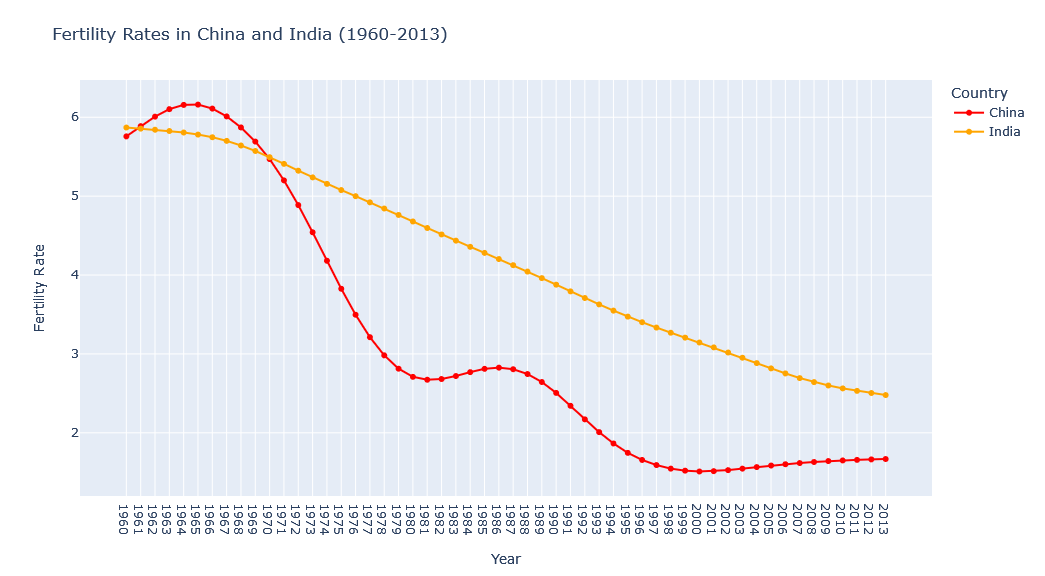

In [55]:
# Extract data for China and India
china_data = df.loc['China'].dropna()
india_data = df.loc['India'].dropna()

fig = go.Figure()

fig.add_trace(go.Scatter(x=china_data.index, y=china_data.values, mode='lines+markers', name='China', line=dict(color='red')))
fig.add_trace(go.Scatter(x=india_data.index, y=india_data.values, mode='lines+markers', name='India', line=dict(color='orange')))

# Update layout with specified dimensions
fig.update_layout(
    title='Fertility Rates in China and India (1960-2013)',
    xaxis_title='Year',
    yaxis_title='Fertility Rate',
    legend_title='Country',
    width=1100,  # Width in pixels (30 inches * 96 DPI)
    height=576,  # Height in pixels (6 inches * 96 DPI)
    margin=dict(l=80, r=80, t=80, b=80)  # Adjust margins to fit the larger size
)

# Show plot
fig.show()

Over the past several decades, from 1960 to 2013, the fertility rates in China and India have exhibited distinct patterns reflective of their unique socio-economic and policy environments. In China, the fertility rate has shown a dramatic decline, particularly due to the One-Child Policy introduced in 1979. This policy aimed to control the rapidly growing population by restricting most urban couples to having only one child, with some exceptions for rural families and ethnic minorities. The policy significantly reduced birth rates, resulting in one of the lowest fertility rates in the world by the early 21st century. However, it also led to long-term demographic challenges, such as a skewed gender ratio and an aging population. In contrast, India’s fertility rate, while also declining, has done so at a more gradual pace throughout this period. India’s approach to population control has been less restrictive, focusing on voluntary family planning and education rather than enforcement. As a result, India’s fertility rate remains higher than China’s but has been steadily decreasing due to improved healthcare and increased awareness. 

# Conclusion

Our dataset, which tracks global fertility rates from 1960 to 2013, provides insights into the evolving demographic dynamics across various countries over more than five decades.

Rwanda, Yemen, Afghanistan, and Niger each reflect unique periods of high birth rates influenced by factors such as limited access to healthcare and population policies. These countries faced significant challenges due to high fertility rates, which were often driven by insufficient family planning resources and differing economic conditions.

The data reveals a substantial decline in fertility rates from 1960 to 2013. Initially, European countries like Latvia and Germany had the lowest birth rates, with a noticeable drop attributed to increased living costs and changing societal norms. By the late 20th century, East Asian regions such as Hong Kong and Macao experienced even lower rates, driven by urbanization and high living expenses. This global shift towards lower fertility rates underscores the impact of economic development and evolving family norms.

Globally, the trend from 1960 to 2013 shows a significant reduction in fertility rates, from over 5.5 to under 3 children per woman. This decline reflects transformative changes, including better healthcare access, expanded educational opportunities for women, and shifting cultural attitudes towards smaller families. These factors highlight the progress made in managing population growth and improving quality of life.

The analysis shows that Libya, Costa Rica, and Mongolia experienced the most significant reductions in fertility rates, with decreases around 5.5, 5.3, and 5.2 births per woman, respectively. In contrast, Bermuda, Liechtenstein, and Mali exhibited minimal changes, with differences of approximately 0.2, 0.3, and 0.3 births per woman, indicating relatively stable fertility rates. This variation highlights the diverse pace of demographic changes across different regions.

Regional differences are also evident between the Middle East and Central Europe from 1960 to 2013. Middle Eastern countries show higher and more variable fertility rates due to cultural norms that favor larger families and differing levels of economic development. In contrast, Central European countries have lower and more stable fertility rates, influenced by increased living costs and shifting societal expectations towards smaller family sizes.

Comparing the world’s two most populous countries, China and India, reveals a divergence in fertility trends over this period. China, influenced by its One-Child Policy, faces challenges related to an aging population and potential labor shortages, while India benefits from a youthful demographic and a growing labor force. These trends highlight the broader demographic shifts and policy impacts in the two countries.